In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams["font.family"] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
from google.colab import files
uploaded=files.upload()

Saving sse.csv to sse.csv


In [30]:
import io
data=pd.read_csv(io.BytesIO(uploaded['sse.csv']))

In [31]:
data.head()

,Date,Open,High,Low,Close,Volume,Change
0,2018-01-02,51380,51400,50780,51020,169485,0.001177
1,2018-01-03,52540,52560,51420,51620,200270,0.011760
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461
3,2018-01-05,51300,52120,51200,52120,189623,0.020360
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [32]:
df=data
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,2018-01-02,51380,51400,50780,51020,169485,0.001177
1,2018-01-03,52540,52560,51420,51620,200270,0.011760
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461
3,2018-01-05,51300,52120,51200,52120,189623,0.020360
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [33]:
df=df[df['Open']!=0]

In [37]:
#df.drop('Open', axis=1, inplace=True)
df.drop('High', axis=1, inplace=True)
df.drop('Low', axis=1, inplace=True)
df.drop('Volume', axis=1, inplace=True)
df.drop('Change', axis=1, inplace=True)


In [38]:
df.index=pd.to_datetime(df.Date)
df.drop('Date',axis=1,inplace=True)
df=df['2018-01-01':]
df.head()

,Close
Date,
2018-01-02,51020
2018-01-03,51620
2018-01-04,51080
2018-01-05,52120
2018-01-08,52020


In [40]:
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df)
scale_cols=['Close']

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled.head()

,Close
0,0.543888
1,0.567936
2,0.546293
3,0.587976
4,0.583968


In [42]:
TEST_SIZE=100
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [43]:
def make_dataset(data, label, window_size=365):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [45]:
feature_cols = df.columns
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2,shuffle=False)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(392, 20, 1) (392, 1)
(98, 20, 1) (98, 1)


In [46]:
test_feature=test[feature_cols]
test_label=test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((80, 20, 1), (80, 1))

In [50]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20,monitor='val_loss')
history=model.fit(x_train,y_train,epochs=100,batch_size=1,validation_split=0,callbacks=[early_stopping])

Epoch 1/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0014 - mse: 0.0014
Epoch 2/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 3/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 4/100
392/392 [==============================] - 1s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 5/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0013 - mse: 0.0013
Epoch 6/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 7/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 8/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0011 - mse: 0.0011
Epoch 9/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0012 - mse: 0.0012
Epoch 10/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0011 - mse: 0.0011
Epoch 11/100
392/392 [=================

In [54]:
pred=model.predict(test_feature)

In [55]:
pd.DataFrame(history.history).plot

In [56]:
pred.shape

(80, 1)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


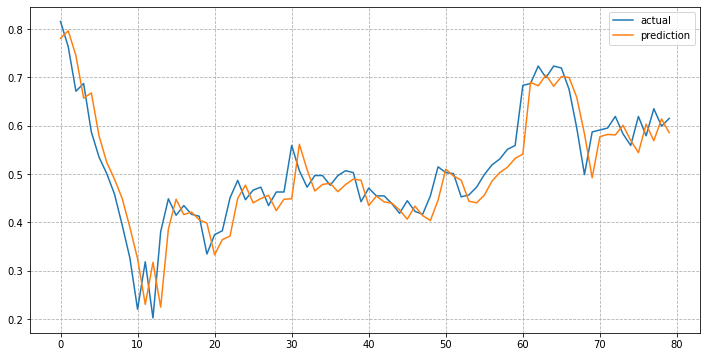

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid(ls='--')
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


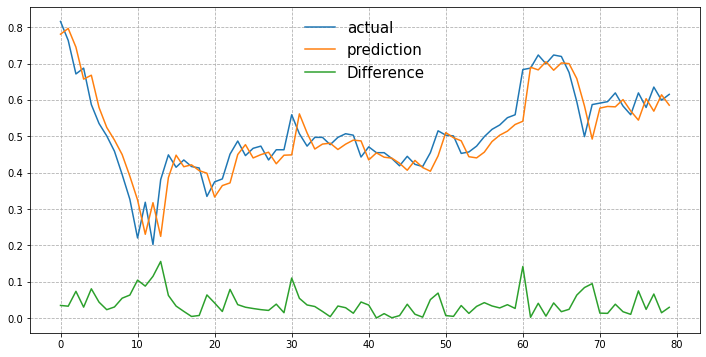

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.plot(np.sqrt((pred - test_label)**2), label='Difference')
plt.legend(frameon=False, fontsize = 15)
plt.grid(ls='--')
plt.show()

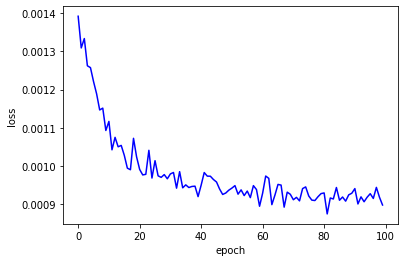

In [59]:
#훈련 손실값loss
fig, loss_ax=plt.subplots()
loss_ax.plot(history.history['loss'], 'b', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [60]:
mse=mean_squared_error(test_label, pred)
rmse=np.sqrt(mse)
rmse


0.0505789075567714

In [71]:
print(pred)

[[0.7806563 ]
 [0.796416  ]
 [0.7450249 ]
 [0.65707934]
 [0.6678543 ]
 [0.5790689 ]
 [0.52429885]
 [0.48963362]
 [0.44969356]
 [0.39015597]
 [0.32502007]
 [0.23056424]
 [0.31741977]
 [0.22484913]
 [0.38639456]
 [0.4480496 ]
 [0.4162585 ]
 [0.42152262]
 [0.40548834]
 [0.39850733]
 [0.33304647]
 [0.36443096]
 [0.3718507 ]
 [0.44983298]
 [0.4769563 ]
 [0.44043466]
 [0.4495403 ]
 [0.4561377 ]
 [0.42442125]
 [0.44794336]
 [0.44884905]
 [0.56157666]
 [0.50920707]
 [0.4649772 ]
 [0.47856867]
 [0.48099783]
 [0.4636538 ]
 [0.47831917]
 [0.48947698]
 [0.48729667]
 [0.43499252]
 [0.45441896]
 [0.44247973]
 [0.43990743]
 [0.42584357]
 [0.40663898]
 [0.43361095]
 [0.41405952]
 [0.40390545]
 [0.44608626]
 [0.5100509 ]
 [0.49607402]
 [0.48755533]
 [0.4438219 ]
 [0.44059417]
 [0.45632926]
 [0.4855232 ]
 [0.5029585 ]
 [0.5141002 ]
 [0.5323895 ]
 [0.5413124 ]
 [0.68978727]
 [0.68252313]
 [0.70487577]
 [0.6815896 ]
 [0.7016575 ]
 [0.69969344]
 [0.65857416]
 [0.5831334 ]
 [0.492303  ]
 [0.5773685 ]
 [0.58

In [72]:
trainPredict=scaler.inverse_transform(pred)

In [73]:
print(trainPredict)

[[56927.37 ]
 [57320.574]
 [56038.375]
 [53844.13 ]
 [54112.965]
 [51897.77 ]
 [50531.254]
 [49666.36 ]
 [48669.85 ]
 [47184.39 ]
 [45559.25 ]
 [43202.58 ]
 [45369.62 ]
 [43059.99 ]
 [47090.543]
 [48628.836]
 [47835.65 ]
 [47966.99 ]
 [47566.934]
 [47392.758]
 [45759.51 ]
 [46542.555]
 [46727.676]
 [48673.332]
 [49350.06 ]
 [48438.844]
 [48666.03 ]
 [48830.637]
 [48039.31 ]
 [48626.188]
 [48648.785]
 [51461.34 ]
 [50154.715]
 [49051.18 ]
 [49390.29 ]
 [49450.9  ]
 [49018.16 ]
 [49384.062]
 [49662.45 ]
 [49608.05 ]
 [48303.062]
 [48787.754]
 [48489.867]
 [48425.688]
 [48074.797]
 [47595.64 ]
 [48268.594]
 [47780.785]
 [47527.44 ]
 [48579.85 ]
 [50175.77 ]
 [49827.047]
 [49614.504]
 [48523.355]
 [48442.824]
 [48835.414]
 [49563.805]
 [49998.812]
 [50276.797]
 [50733.117]
 [50955.742]
 [54660.19 ]
 [54478.95 ]
 [55036.652]
 [54455.664]
 [54956.35 ]
 [54907.35 ]
 [53881.426]
 [51999.176]
 [49732.957]
 [51855.348]
 [51970.56 ]
 [51944.098]
 [52440.734]
 [51661.336]
 [51030.926]
 [52502.6  ]

In [75]:
loss, mae=model.evaluate(x_train, y_train, batch_size=1)
print(loss, mae)
#mae는 오차의 절대값: 0이 제일 정확

392/392 [==============================] - 1s 2ms/step - loss: 8.9081e-04 - mse: 8.9081e-04
0.0008908134768716991 0.0008908134768716991


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


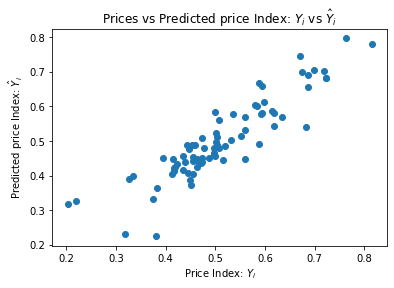

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(test_label, pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")
#예측값과 원래값이 일치하면 직선에 가깝게 분포됨

In [82]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_valid, y_valid, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(test_feature,test_label, verbose=0)
print('Test Score: ', testScore)

Train Score:  [0.0008908141753636301, 0.0008908141753636301]
Validataion Score:  [0.001471913419663906, 0.001471913419663906]
Test Score:  [0.002558225765824318, 0.002558225765824318]
